In [1]:
#Imports
import pandas as pd
import snscrape.modules.twitter as sntwitter

In [2]:
#Initialize Tweet List
fake_vac_tweets_list = []
funny_tweet_list = []
text_list = []

In [3]:
#Pull tweets from Twitter API that contain "Fake vaccinations" in text of post
for i, tweet in enumerate(sntwitter.TwitterSearchScraper('Fake vaccinations').get_items()):
    if i > 999:
        break
    fake_vac_tweets_list.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.replyCount, tweet.retweetCount, tweet.likeCount, tweet.url])
    text_list.append(tweet.content)

In [4]:
#Create DataFrame
fake_vac_df = pd.DataFrame(fake_vac_tweets_list, columns=['Datetime', 'Tweet Id', 'Text', 'Username', 'Reply Count', 'Retweet Count', 'Like Count', 'URL'])

In [5]:
#Convert Text column to lowercase for searching purposes
fake_vac_df['Text'] = fake_vac_df['Text'].str.lower()
fake_vac_df

,Datetime,Tweet Id,Text,Username,Reply Count,Retweet Count,Like Count,URL
0,2021-01-10 18:59:37+00:00,1348343758346199043,now your being controlled by #fakepolls #faken...,bigbadant,0,0,1,https://twitter.com/bigbadant/status/134834375...
1,2021-01-10 18:56:14+00:00,1348342904289431556,@guyjeff1 @medicalfollower ils ont officiellem...,LoveIsAHoax6_7,0,1,0,https://twitter.com/LoveIsAHoax6_7/status/1348...
2,2021-01-10 17:19:53+00:00,1348318658813050884,@tweeterabhinav @dchaurasia2312 everything is ...,Ik0Nihcas,0,0,0,https://twitter.com/Ik0Nihcas/status/134831865...
3,2021-01-10 16:29:56+00:00,1348306088869961728,@barrysheerman get a grip bazza. trump was ban...,Halo77993716,0,0,0,https://twitter.com/Halo77993716/status/134830...
4,2021-01-10 15:55:17+00:00,1348297368488321026,@justin_ling @vicecanada @shannonstubbsmp this...,JoeSeven,0,0,0,https://twitter.com/JoeSeven/status/1348297368...
...,...,...,...,...,...,...,...,...
995,2020-12-08 18:23:52+00:00,1336375962146119681,@staying_in_2020 @andywebster @kevinnash82 @cl...,kerry_kriel,1,0,0,https://twitter.com/kerry_kriel/status/1336375...
996,2020-12-08 16:10:43+00:00,1336342454430154752,the fake news media is already promoting force...,ChristophersKn1,0,0,1,https://twitter.com/ChristophersKn1/status/133...
997,2020-12-08 16:08:53+00:00,1336341989701390337,trump couldn't order enough vaccinations becau...,livetweettweet,4,1,3,https://twitter.com/livetweettweet/status/1336...
998,2020-12-08 15:40:28+00:00,1336334841759985668,"@nytimes thank you, pres trump! you are a very...",bkFreedomForAll,0,1,1,https://twitter.com/bkFreedomForAll/status/133...


In [6]:
# #Calculate number of tweets containg various words
# fear_num = fake_vac_df['Text'][fake_vac_df['Text'].str.contains('fear')==True].count()
# hoax_num = fake_vac_df['Text'][fake_vac_df['Text'].str.contains('hoax')==True].count()
# microchip_num = fake_vac_df['Text'][fake_vac_df['Text'].str.contains('microchip')==True].count()
# conspiracy_num = fake_vac_df['Text'][fake_vac_df['Text'].str.contains('conspiracy')==True].count()
# gates_num = fake_vac_df['Text'][(fake_vac_df['Text'].str.contains('bill gates')==True)].count()

In [7]:
# #Create bargraph
# import matplotlib.pyplot as plt
# fig = plt.figure()
# ax = fig.add_axes([0,1,2,1])
# ax.set_title('1000 Tweets containing Fake vaccinations Since 12/08/2020')
# ax.set_ylabel('Number of Occurences')
# labels = ['Contains Fear', 'Contains Hoax', 'Contains Microchip', 'Contains Conspiracy', 'Contains Bill Gates']
# count_tweets = [fear_num, hoax_num, microchip_num, conspiracy_num, gates_num]
# ax.bar(labels,count_tweets)
# plt.show()

# Fuzzy Matching Stuff

In [8]:
#Install fuzztwuzzy 
pip install fuzzywuzzy

SyntaxError: invalid syntax (<ipython-input-8-c2f6b963bff0>, line 2)

In [9]:
#Imports
from fuzzywuzzy import fuzz

/opt/anaconda3/lib/python3.8/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [10]:
#Method to determine if fuzzymatch or not
def fuzzy_match(str1: str, str2: str) -> bool:
    token_set_ratio = fuzz.token_set_ratio(str1, str2)
    if str2 in str1:
        return True
    if token_set_ratio > 55:
        return True
    else:
        return False

In [11]:
#Calculate number of tweets containg various words
#Should pass String comparing to in lower case because made all entries in Text column lowercase
fear_num = fake_vac_df['Text'][fake_vac_df['Text'].apply(lambda str1: fuzzy_match(str1, 'fear'))==True].count()
hoax_num = fake_vac_df['Text'][fake_vac_df['Text'].apply(lambda str1: fuzzy_match(str1, 'hoax'))==True].count()
microchip_num = fake_vac_df['Text'][fake_vac_df['Text'].apply(lambda str1: fuzzy_match(str1, 'microchip'))==True].count()
conspiracy_num = fake_vac_df['Text'][fake_vac_df['Text'].apply(lambda str1: fuzzy_match(str1, 'conspiracy'))==True].count()
gates_num = fake_vac_df['Text'][fake_vac_df['Text'].apply(lambda str1: fuzzy_match(str1, 'bill gates'))==True].count()
funny_tweet_list.append(fake_vac_tweets_list[212])

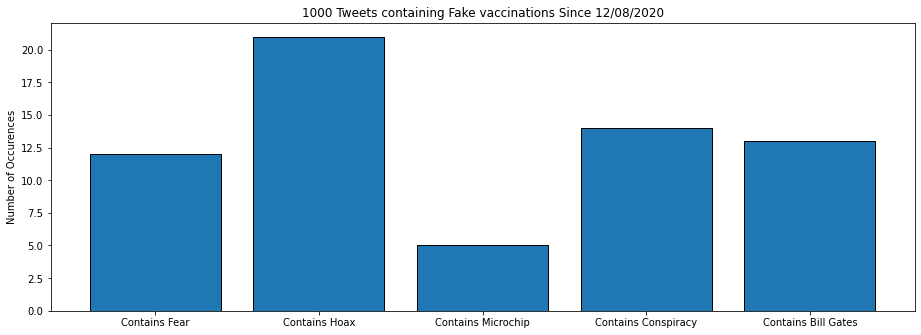

In [12]:
#Create bargraph
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,1,2,1])
ax.set_title('1000 Tweets containing Fake vaccinations Since 12/08/2020')
ax.set_ylabel('Number of Occurences')
labels = ['Contains Fear', 'Contains Hoax', 'Contains Microchip', 'Contains Conspiracy', 'Contains Bill Gates']
count_tweets = [fear_num, hoax_num, microchip_num, conspiracy_num, gates_num]
ax.bar(labels,count_tweets, edgecolor='black')
plt.show()

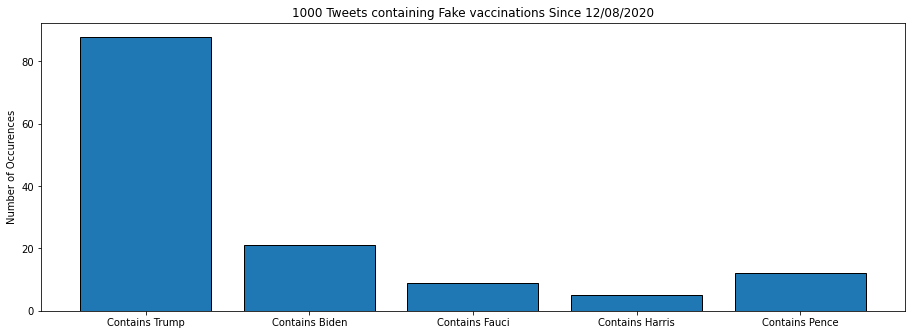

In [13]:
trump_num = fake_vac_df['Text'][fake_vac_df['Text'].apply(lambda str1: fuzzy_match(str1, 'trump'))==True].count()
biden_num = fake_vac_df['Text'][fake_vac_df['Text'].apply(lambda str1: fuzzy_match(str1, 'biden'))==True].count()
fauci_num = fake_vac_df['Text'][fake_vac_df['Text'].apply(lambda str1: fuzzy_match(str1, 'fauci'))==True].count()
harris_num = fake_vac_df['Text'][fake_vac_df['Text'].apply(lambda str1: fuzzy_match(str1, 'harris'))==True].count()
pence_num = fake_vac_df['Text'][fake_vac_df['Text'].apply(lambda str1: fuzzy_match(str1, 'pence'))==True].count()
gates_num = fake_vac_df['Text'][fake_vac_df['Text'].apply(lambda str1: fuzzy_match(str1, 'bill gates'))==True].count()

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,1,2,1])
ax.set_title('1000 Tweets containing Fake vaccinations Since 12/08/2020')
ax.set_ylabel('Number of Occurences')
labels = ['Contains Trump', 'Contains Biden', 'Contains Fauci', 'Contains Harris', 'Contains Pence']
count_tweets = [trump_num, biden_num, fauci_num, harris_num, pence_num]
ax.bar(labels,count_tweets, edgecolor='black')
plt.show()

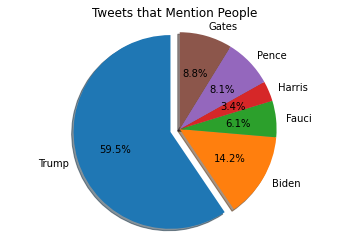

In [14]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
sum = trump_num + biden_num + fauci_num + harris_num + pence_num + gates_num
labels = 'Trump', 'Biden', 'Fauci', 'Harris', 'Pence', 'Gates'
sizes = [100 * trump_num / sum, 100 * biden_num / sum, 100 * fauci_num / sum, 100 * harris_num / sum, 100 * pence_num / sum, 100 * gates_num / sum]
explode = (0.1 , 0, 0, 0, 0, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Tweets that Mention People')
plt.show()

## Tried to make pie chart of tweets mentioning trump

In [15]:
# trump_df = fake_vac_df[fake_vac_df['Text'].apply(lambda str1: fuzzy_match(str1, 'trump'))==True]
# fear_num = trump_df['Text'][trump_df['Text'].apply(lambda str1: fuzzy_match(str1, 'fear'))==True].count()
# hoax_num = trump_df['Text'][trump_df['Text'].apply(lambda str1: fuzzy_match(str1, 'hoax'))==True].count()
# rigged_num = trump_df['Text'][trump_df['Text'].apply(lambda str1: fuzzy_match(str1, 'rigged'))==True].count()
# conspiracy_num = trump_df['Text'][trump_df['Text'].apply(lambda str1: fuzzy_match(str1, 'conspiracy'))==True].count()
# gates_num = trump_df['Text'][trump_df['Text'].apply(lambda str1: fuzzy_match(str1, 'bill gates'))==True].count()
# print(fear_num, hoax_num, rigged_num, conspiracy_num, gates_num)
# trump_df

## Tweet List At Momment

In [71]:
#Prints out tweets in list
for entry in funny_tweet_list:
    print(entry)
    print()

[datetime.datetime(2021, 1, 3, 14, 53, 43, tzinfo=datetime.timezone.utc), 1345745158353117194, '@realDonaldTrump You first call it fake then you’re boasting about the fact that the vaccines are being delivered. WTF are you delivering vaccinations for something that isn’t “ REAL “', 'Mohamme28143483', 0, 0, 0]



## Top tweets

In [79]:
#Replaces missing values with 0
fake_vac_df.fillna(value=0.0, inplace=True)
#Sorts DataFrame according to Like Count, Retweet Count, and Reply Count
fake_vac_df.sort_values(['Like Count', 'Retweet Count', 'Reply Count'], ascending=False, inplace=True)

In [83]:
#Prints out top 20
fake_vac_df.head(20)

,Datetime,Tweet Id,Text,Username,Reply Count,Retweet Count,Like Count
550,2020-12-21 20:33:42+00:00,1341119678177939456,i wonder if we can calculate how many black ci...,ScottAdamsSays,165,400,2481
354,2020-12-29 03:34:23+00:00,1343762260301410304,from scams soliciting donations for fake chari...,amyklobuchar,54,201,1120
312,2020-12-30 15:00:20+00:00,1344297273891590146,"non-kinetic war with china, with whiteboard, s...",ScottAdamsSays,106,164,476
656,2020-12-19 13:42:01+00:00,1340291298398486529,➡️ il s'agissait donc d'un malaise/évanouissem...,FAKE_Investiga,3,50,409
360,2020-12-29 02:32:31+00:00,1343746691367895041,"passé l'émotion et après analyse, il est clair...",christo_comte,17,66,313
389,2020-12-27 19:03:39+00:00,1343271342985019393,i overheard a convo between 2 men. one of the ...,TheMindsculpter,43,23,215
693,2020-12-19 00:12:19+00:00,1340087528838344704,more and more fake vaccinations are being give...,ChrisWickNews,9,48,199
989,2020-12-09 02:03:39+00:00,1336491671505268742,"in case you doubt it, do this at home: 1) go t...",PeterHotez,18,34,182
967,2020-12-09 15:48:52+00:00,1336699342116114432,several covid19 vaccinations have been announc...,MahaCyber1,4,50,174
39,2021-01-08 01:50:20+00:00,1347359955586670592,"with trump vowing an ""orderly transition of po...",Noahpinion,30,2,135


In [87]:
#Adds top misinformation tweets to list and prints out
top_misinformation_tweets = []
for num in [389, 693, 989, 774, 361]:
    top_misinformation_tweets.append(fake_vac_tweets_list[num])
for entry in top_misinformation_tweets:
    print(entry)
    print()

[datetime.datetime(2020, 12, 27, 23, 3, 28, tzinfo=datetime.timezone.utc), 1343331695357902848, 'After the Fake Voting is over we should push forward with Vaccinations and stop the wild spending going on in the House of Representatives. Cool the printing presses, and subtract some zeros from the block chains or China wins.', 'SanskritSand', 0, 0, 0, 'https://twitter.com/SanskritSand/status/1343331695357902848']

[datetime.datetime(2020, 12, 19, 0, 56, 43, tzinfo=datetime.timezone.utc), 1340098704045387781, '@ABDaDisciple @JoJo_Camp23 Just saw that lol after seeing 3 videos of FAKE vaccinations I’m good. They ain’t even really getting the vaccine.', 'Tai_Lovee', 0, 0, 1, 'https://twitter.com/Tai_Lovee/status/1340098704045387781']

[datetime.datetime(2020, 12, 9, 0, 0, 27, tzinfo=datetime.timezone.utc), 1336460664064405506, 'Les vaccinations fake ont démarrés..et a la première on les a déjà démasqué..😅\nLe bouchon encore sur l aiguille fallait oser.. ils nous prennent VRAIMENT pour des d

## Top Sources

In [135]:
#Groups tweets by username and then sorts and prints out top 15
user_df = fake_vac_df.groupby('Username').mean()
user_df.sort_values(['Like Count', 'Retweet Count', 'Reply Count'], ascending=False, inplace=True)
user_df.head(15)

,Tweet Id,Reply Count,Retweet Count,Like Count
Username,,,,
ScottAdamsSays,1.342708e+18,135.5,282.0,1478.5
amyklobuchar,1.343762e+18,54.0,201.0,1120.0
FAKE_Investiga,1.340291e+18,3.0,50.0,409.0
christo_comte,1.343747e+18,17.0,66.0,313.0
TheMindsculpter,1.343271e+18,43.0,23.0,215.0
ChrisWickNews,1.340088e+18,9.0,48.0,199.0
PeterHotez,1.336492e+18,18.0,34.0,182.0
MahaCyber1,1.336699e+18,4.0,50.0,174.0
Noahpinion,1.347360e+18,30.0,2.0,135.0


In [89]:
#Creates top sources list
top_sources = []
fake_vac_df[fake_vac_df['Username'] == 'TheMindsculpter']

,Datetime,Tweet Id,Text,Username,Reply Count,Retweet Count,Like Count,URL
394,2020-12-27 19:03:39+00:00,1343271342985019393,i overheard a convo between 2 men. one of the ...,TheMindsculpter,42,22,215,https://twitter.com/TheMindsculpter/status/134...


In [90]:
print(fake_vac_tweets_list[389])
top_sources.append('TheMindsculpter')

[datetime.datetime(2020, 12, 27, 23, 3, 28, tzinfo=datetime.timezone.utc), 1343331695357902848, 'After the Fake Voting is over we should push forward with Vaccinations and stop the wild spending going on in the House of Representatives. Cool the printing presses, and subtract some zeros from the block chains or China wins.', 'SanskritSand', 0, 0, 0, 'https://twitter.com/SanskritSand/status/1343331695357902848']


In [91]:
fake_vac_df[fake_vac_df['Username'] == 'ChrisWickNews']

,Datetime,Tweet Id,Text,Username,Reply Count,Retweet Count,Like Count,URL
695,2020-12-19 00:12:19+00:00,1340087528838344704,more and more fake vaccinations are being give...,ChrisWickNews,9,48,199,https://twitter.com/ChrisWickNews/status/13400...


In [92]:
print(fake_vac_tweets_list[693])
top_sources.append('ChrisWickNews')

[datetime.datetime(2020, 12, 19, 0, 56, 43, tzinfo=datetime.timezone.utc), 1340098704045387781, '@ABDaDisciple @JoJo_Camp23 Just saw that lol after seeing 3 videos of FAKE vaccinations I’m good. They ain’t even really getting the vaccine.', 'Tai_Lovee', 0, 0, 1, 'https://twitter.com/Tai_Lovee/status/1340098704045387781']


In [93]:
fake_vac_df[fake_vac_df['Username'] == 'PeterHotez']

,Datetime,Tweet Id,Text,Username,Reply Count,Retweet Count,Like Count,URL
987,2020-12-09 02:03:39+00:00,1336491671505268742,"in case you doubt it, do this at home: 1) go t...",PeterHotez,18,34,181,https://twitter.com/PeterHotez/status/13364916...


In [94]:
print(fake_vac_tweets_list[989])
top_sources.append('PeterHotez')

[datetime.datetime(2020, 12, 9, 0, 0, 27, tzinfo=datetime.timezone.utc), 1336460664064405506, 'Les vaccinations fake ont démarrés..et a la première on les a déjà démasqué..😅\nLe bouchon encore sur l aiguille fallait oser.. ils nous prennent VRAIMENT pour des demeurés c est pas possible..😏\nhttps://t.co/usnnqo91aO\n#Vaccin #Covid_19', 'Flo_NS_', 0, 0, 0, 'https://twitter.com/Flo_NS_/status/1336460664064405506']


In [95]:
fake_vac_df[fake_vac_df['Username'] == 'Natalia01Mateo']

,Datetime,Tweet Id,Text,Username,Reply Count,Retweet Count,Like Count,URL
777,2020-12-18 05:31:51+00:00,1339805555175677953,this is becoming laughable now.\n\nso many vid...,Natalia01Mateo,9,49,113,https://twitter.com/Natalia01Mateo/status/1339...


In [96]:
print(fake_vac_tweets_list[774])
top_sources.append('Natalia01Mateo')

[datetime.datetime(2020, 12, 18, 5, 41, 51, tzinfo=datetime.timezone.utc), 1339808072961843200, 'What are the pro #Vaccine ppl going to say about this then?\n\nWill they STILL be blinded to the scam??\n\nLook closely and You’ll see that the public vaccinations are FAKE to trick ppl into trusting the poison they call a vaccine\n\n#COVIDー19 #BioNTech #svpol \nhttps://t.co/LxHBr4LXVx', 'Dragonsoul9Fire', 5, 5, 23, 'https://twitter.com/Dragonsoul9Fire/status/1339808072961843200']


In [97]:
fake_vac_df[fake_vac_df['Username'] == 'teddyboylocsin']

,Datetime,Tweet Id,Text,Username,Reply Count,Retweet Count,Like Count,URL
366,2020-12-29 01:23:53+00:00,1343729419819438082,i know the yellows will spread their usual ant...,teddyboylocsin,28,15,82,https://twitter.com/teddyboylocsin/status/1343...


In [98]:
print(fake_vac_tweets_list[361])
top_sources.append('teddyboylocsin')

[datetime.datetime(2020, 12, 29, 3, 20, 5, tzinfo=datetime.timezone.utc), 1343758663278878725, "@SwitzersWishbo1 @Whattha1983 I hear ya man. I'm pretty much the same way. I know the vaccine is real because I have family who have been transporting the syringes all over oklahoma for the last few days. Just don't understand the videos of fake vaccinations. Anything can be doctored but most are legit fake.", 'dirtburglar33', 0, 0, 0, 'https://twitter.com/dirtburglar33/status/1343758663278878725']


In [99]:
#Prints out top sources list
for entry in top_sources:
    print(entry)

TheMindsculpter
ChrisWickNews
PeterHotez
Natalia01Mateo
teddyboylocsin


## Funny/Crazy Tweets

In [100]:
gates_df = fake_vac_df[fake_vac_df['Text'].apply(lambda str1: fuzzy_match(str1, 'bill gates'))==True]
for num in gates_df.index:
    print(num, '\n', fake_vac_tweets_list[num])
    print()
funny_tweet_list.append(fake_vac_tweets_list[255])
funny_tweet_list.append(fake_vac_tweets_list[7])
funny_tweet_list.append(fake_vac_tweets_list[67])
funny_tweet_list.insert(0, fake_vac_tweets_list[214])
funny_tweet_list.append(fake_vac_tweets_list[786])
funny_tweet_list.append(fake_vac_tweets_list[920])

5 
 [datetime.datetime(2021, 1, 10, 5, 20, 29, tzinfo=datetime.timezone.utc), 1348137617494138881, 'This is about cheating, fraud, fake news, censorship, race baiting, unborn children, gun reform, pedophilia, sex trafficking, mask mandate, socialism, mandated vaccinations, contact tracing, the bullshit kickback stimulus bill, covid concentration camps, treason, ....', 'MichaelDeLauzon', 2, 72, 198, 'https://twitter.com/MichaelDeLauzon/status/1348137617494138881']

7 
 [datetime.datetime(2021, 1, 10, 3, 48, 55, tzinfo=datetime.timezone.utc), 1348114571769344001, 'I need a couple of vaccinations. One for Covid and one against the forces of evil - Bill Walton  😂😂😂', 'FakeWYOSports', 0, 0, 0, 'https://twitter.com/FakeWYOSports/status/1348114571769344001']

14 
 [datetime.datetime(2021, 1, 9, 21, 17, tzinfo=datetime.timezone.utc), 1348015945269145601, '@cactus12345 @TruthLion100 @stephen_taylor Not only that, the vaccine won’t last long....ask Gates?  I have the same medical degree as him..

In [101]:
for tweet in funny_tweet_list:
    print(tweet)
    print()

[datetime.datetime(2021, 1, 3, 14, 56, 46, tzinfo=datetime.timezone.utc), 1345745925461913605, "@realDonaldTrump @CDCgov Any fake narrative to prove to yourself you didn't suck as a leader.  What happened to the 20 million vaccinations in 2020?  Same as the failed supply chain for promised ventilators and N95 masks early in the year.", 'DBuonocora', 0, 0, 0, 'https://twitter.com/DBuonocora/status/1345745925461913605']

[datetime.datetime(2021, 1, 1, 18, 24, 9, tzinfo=datetime.timezone.utc), 1345073341334478848, "@JoeBiden People aren't getting vaccinated because they don't want it. A virus with a 99.7% survival rate doesn't warrant mass vaccinations. Bottom line, your fear campaign isn't working and like your narrative the people realize you're fake as well.", 'DonaldSwearin11', 0, 0, 0, 'https://twitter.com/DonaldSwearin11/status/1345073341334478848']

[datetime.datetime(2021, 1, 10, 3, 48, 55, tzinfo=datetime.timezone.utc), 1348114571769344001, 'I need a couple of vaccinations. One f

## Create CSV File

In [16]:
text_series = pd.Series(text_list)
text_series.to_csv('Tweet_Text.csv')